                                       Breast Cancer Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('breast_cancer_data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.describe(include='object')

,diagnosis
count,569
unique,2
top,B
freq,357


In [7]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df=df.drop(columns=['id'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

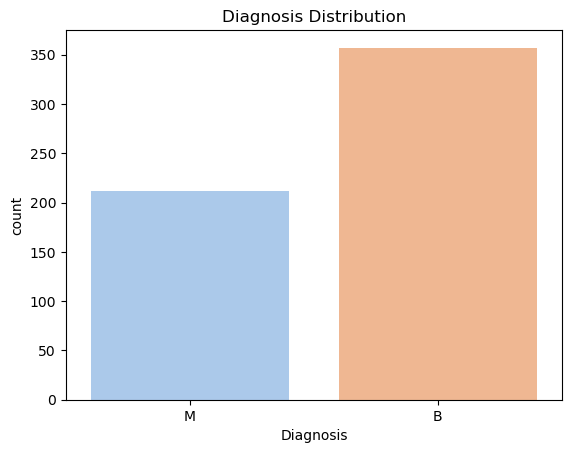

In [11]:
sns.countplot(data=df, x='diagnosis',palette='pastel')
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
#plt.ylabel('Number of Titles')
plt.show()

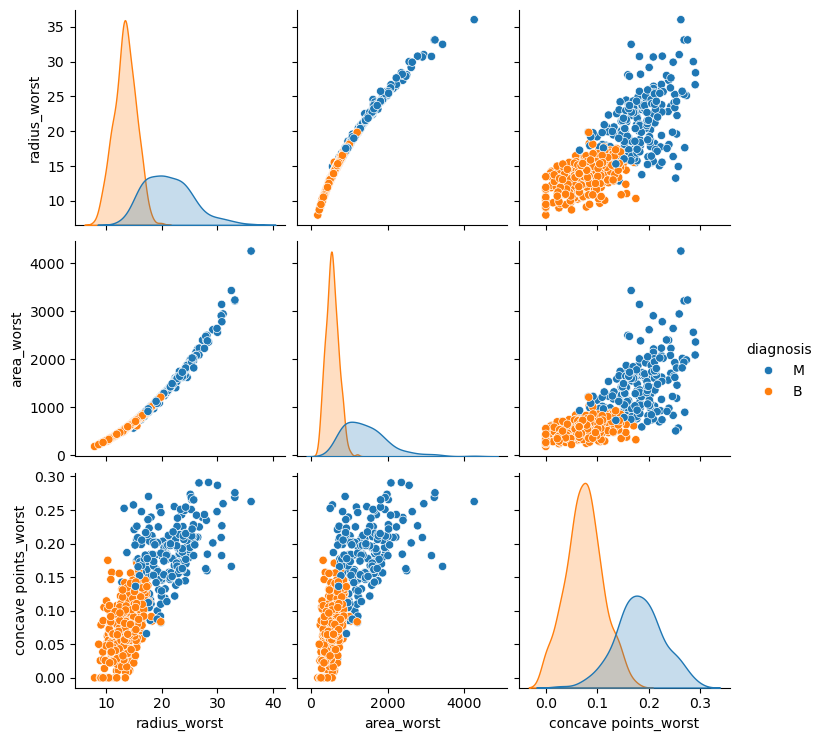

In [12]:
sns.pairplot(
    df,
    vars=['radius_worst','area_worst','concave points_worst'],
    hue='diagnosis'
  )        

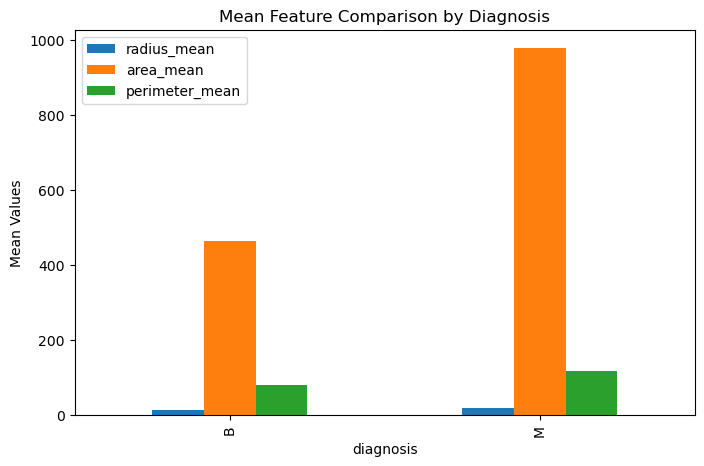

In [13]:
df.groupby('diagnosis')[
     ['radius_mean','area_mean','perimeter_mean']
].mean().plot(kind='bar',figsize=(8,5))
plt.title("Mean Feature Comparison by Diagnosis")
plt.ylabel("Mean Values")
plt.show()

Text(0, 0.5, 'Frequency')

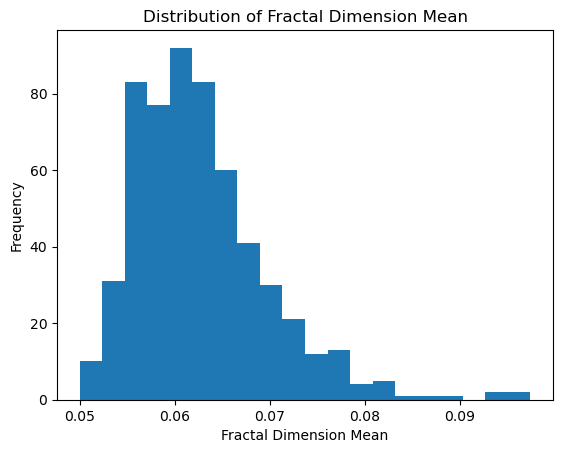

In [14]:
plt.hist(df["fractal_dimension_mean"],bins=20)
plt.title("Distribution of Fractal Dimension Mean")
plt.xlabel("Fractal Dimension Mean")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

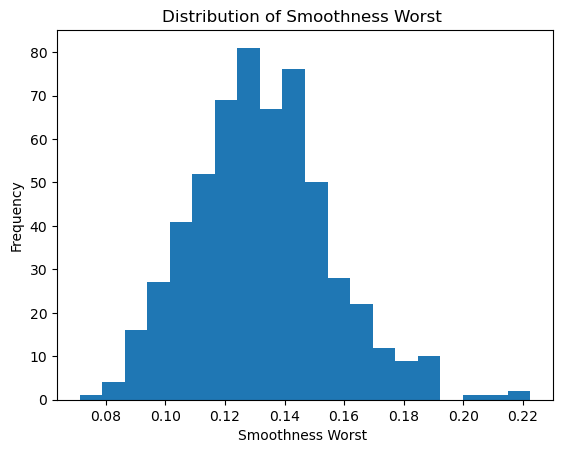

In [15]:
plt.hist(df["smoothness_worst"],bins=20)
plt.title("Distribution of Smoothness Worst ")
plt.xlabel("Smoothness Worst ")
plt.ylabel("Frequency")

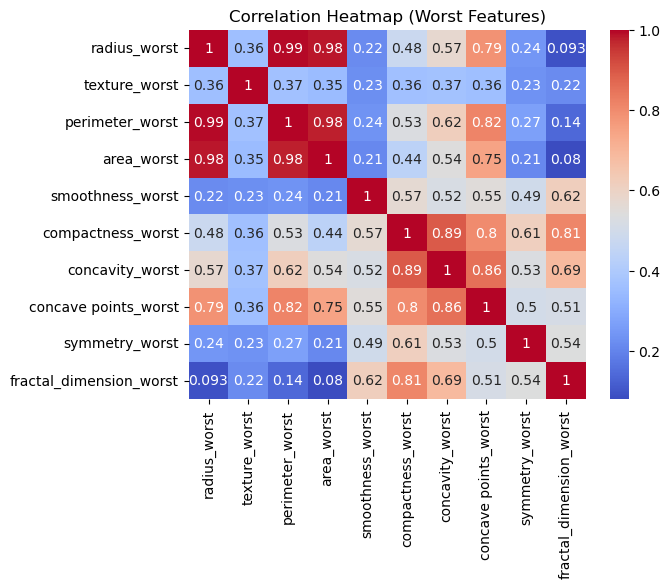

In [16]:
worst_cols=[c for c in df.columns if c.endswith("_worst")]
sns.heatmap(df[worst_cols].corr(), cmap= "coolwarm",annot =True)
plt.title("Correlation Heatmap (Worst Features)")
plt.show()

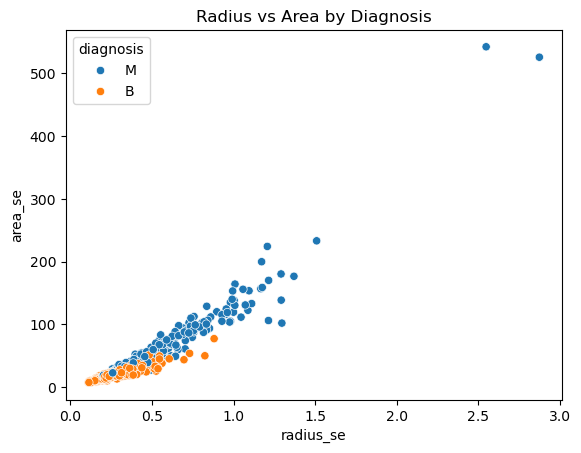

In [17]:
sns.scatterplot(
    x="radius_se",
    y="area_se",
    hue="diagnosis",
    data=df
)
plt.title("Radius vs Area by Diagnosis")
plt.show()

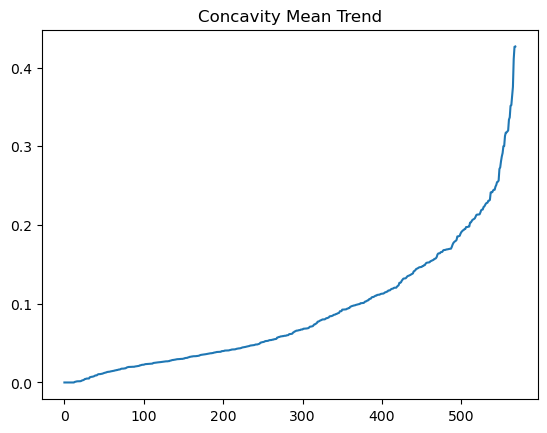

In [18]:
df.sort_values("concavity_mean")["concavity_mean"].reset_index(drop=True).plot()
plt.title("Concavity Mean Trend")
plt.show()

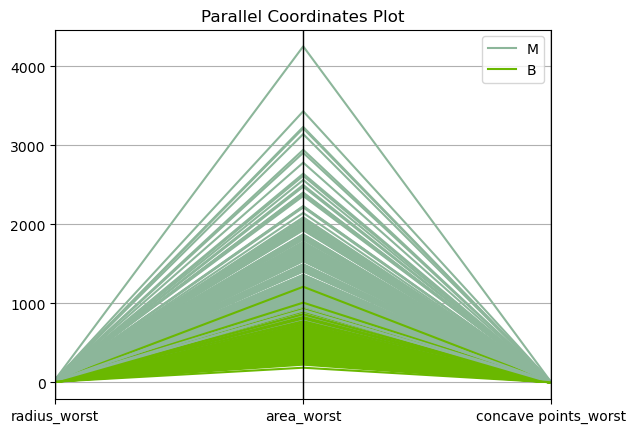

In [19]:
from pandas.plotting import parallel_coordinates
subset = df[["diagnosis","radius_worst","area_worst","concave points_worst"]]
parallel_coordinates(subset,"diagnosis")
plt.title("Parallel Coordinates Plot")
plt.show()

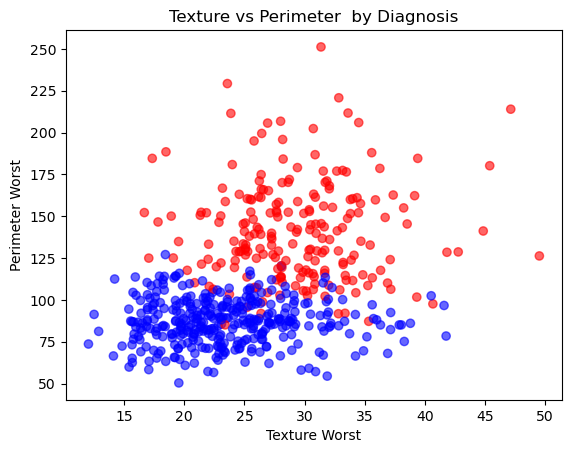

In [20]:
plt.scatter(df["texture_worst"],df["perimeter_worst"],c=(df["diagnosis"] =="M"),cmap="bwr",alpha=0.6)
plt.xlabel("Texture Worst")
plt.ylabel("Perimeter Worst")
plt.title("Texture vs Perimeter  by Diagnosis" )
plt.show()

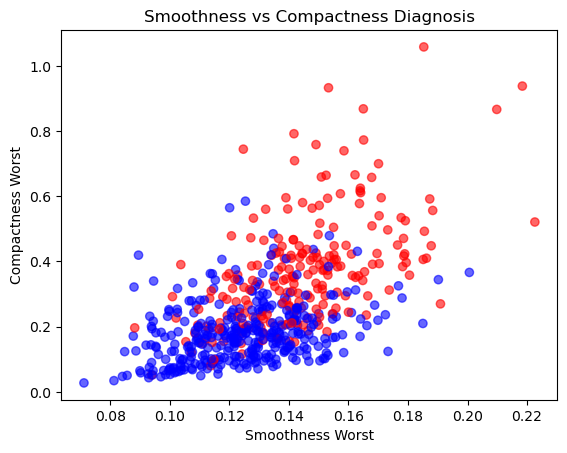

In [21]:
plt.scatter(df["smoothness_worst"],df["compactness_worst"],c=(df["diagnosis"] =="M"),cmap="bwr",alpha=0.6)
plt.xlabel("Smoothness Worst")
plt.ylabel("Compactness Worst")
plt.title("Smoothness vs Compactness Diagnosis" )
plt.show()

In [22]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

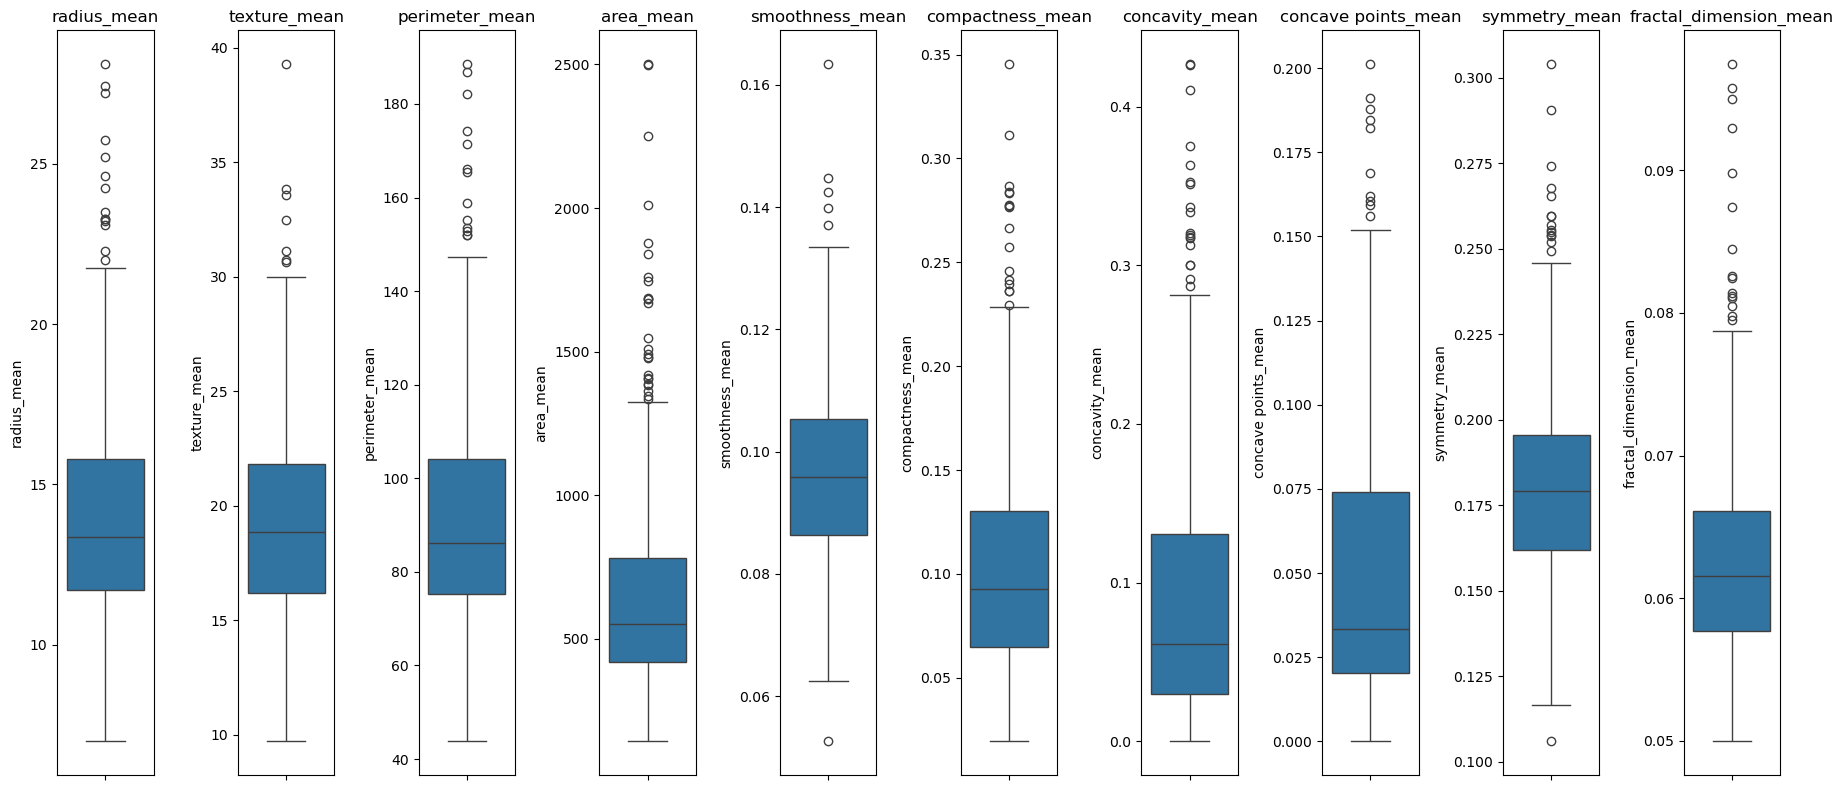

In [23]:
mean_features =[
    "radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean",
    "compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean"
]
plt.figure(figsize=(18,8))
for i, col in enumerate(mean_features, 1):
    plt.subplot(1,len(mean_features),i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

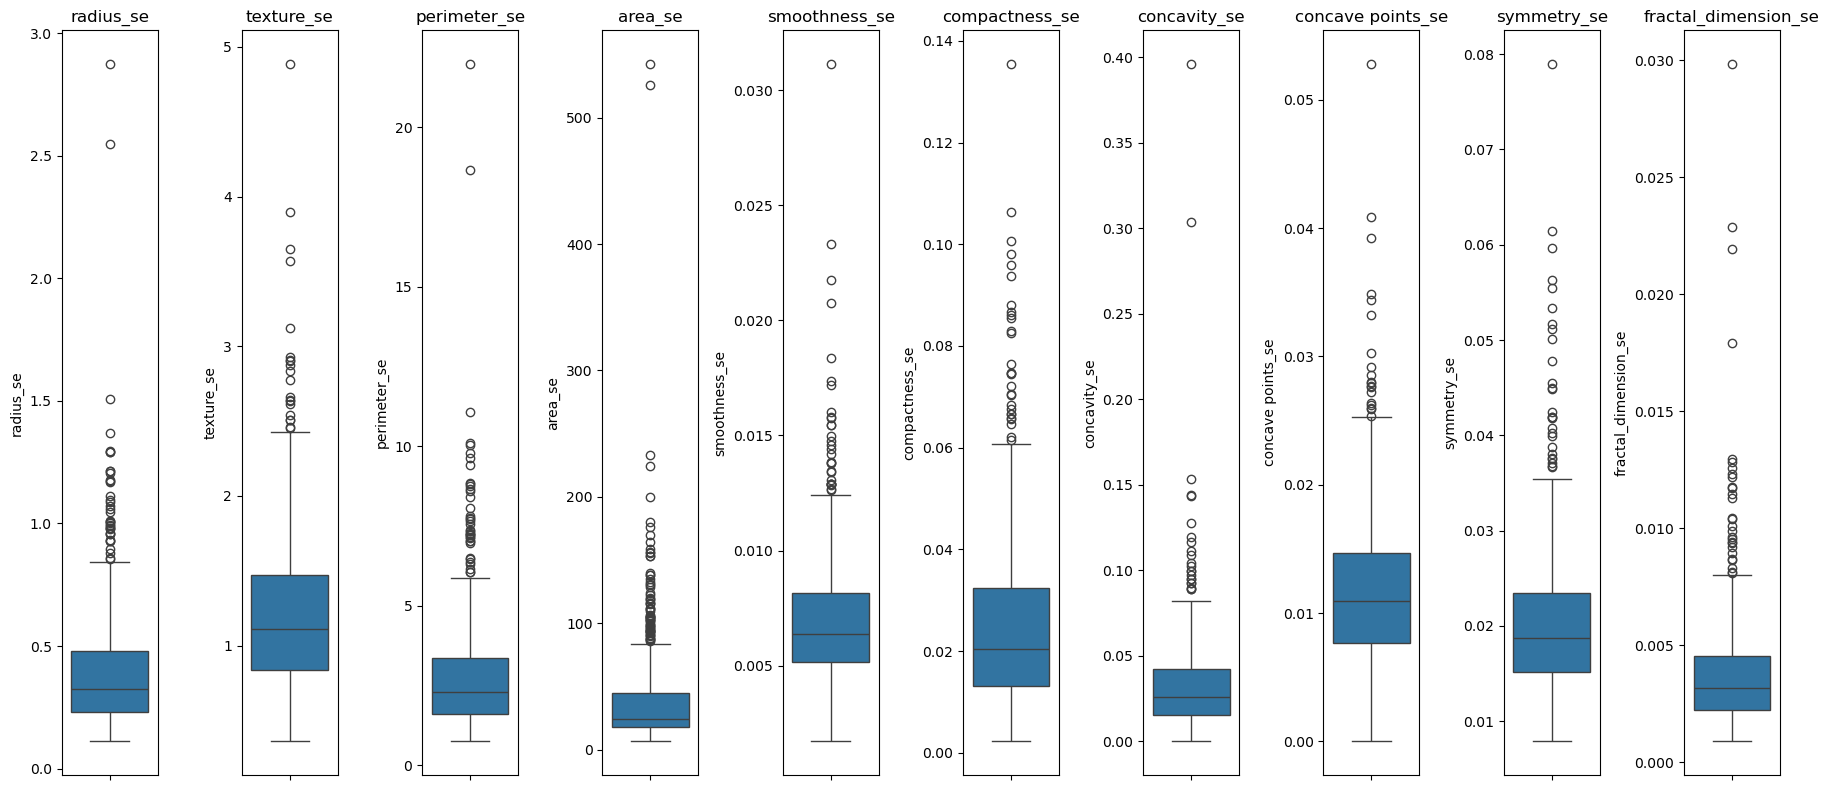

In [24]:
se_features =[
    "radius_se","texture_se","perimeter_se","area_se","smoothness_se",
    "compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se"
]
plt.figure(figsize=(18,8))
for i, col in enumerate(se_features, 1):
    plt.subplot(1,len(se_features),i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

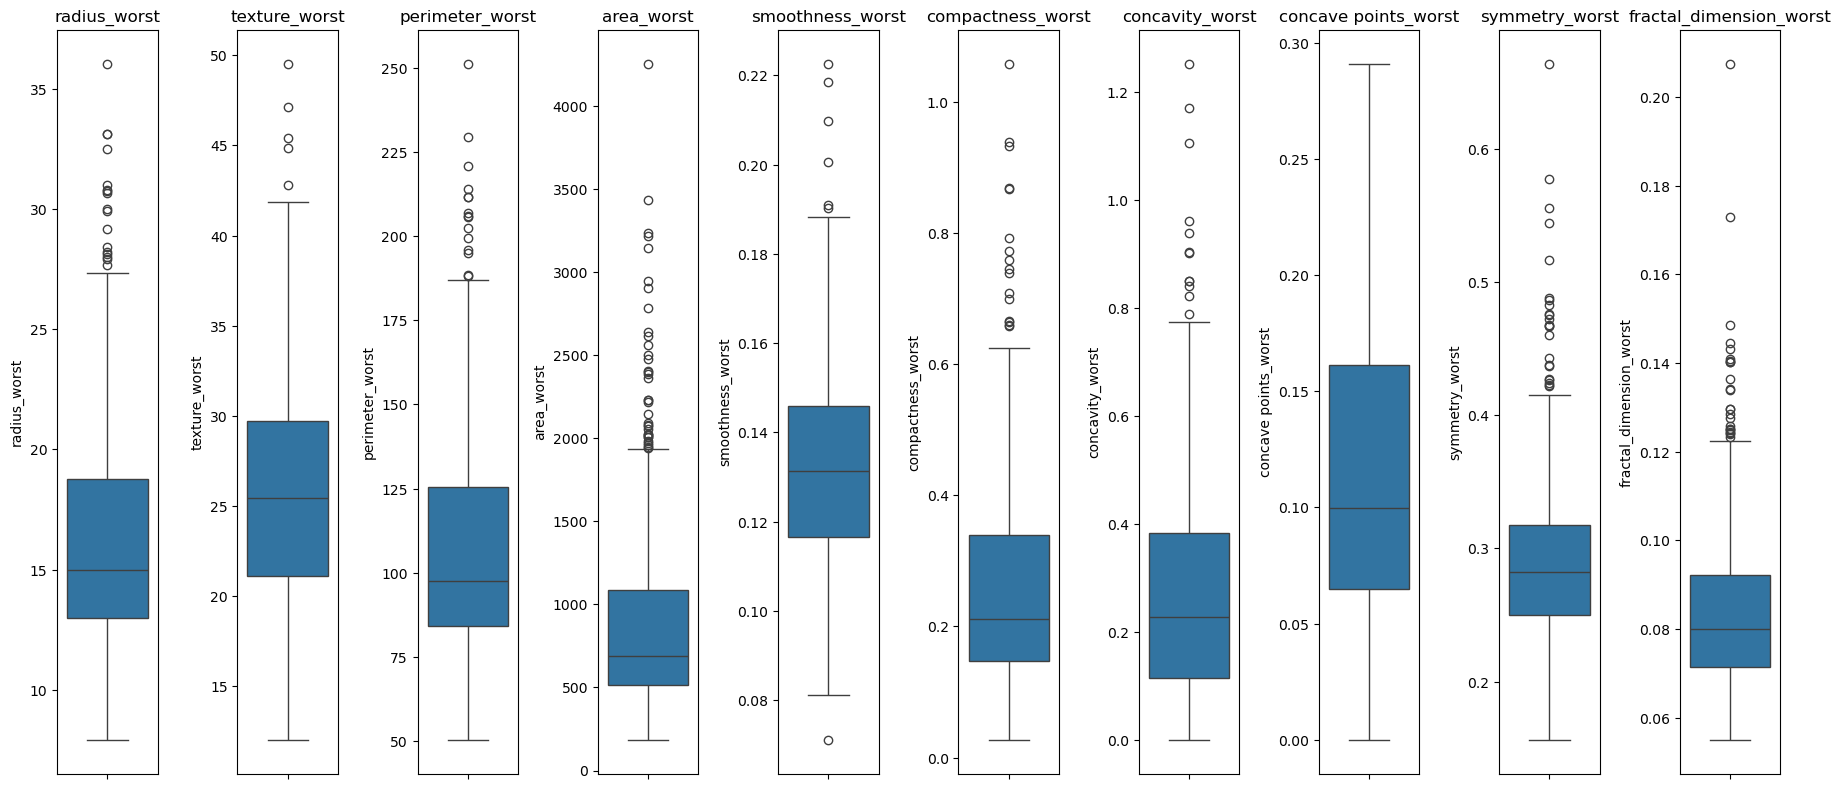

In [25]:
worst_features =[
    "radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst",
    "compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"
]
plt.figure(figsize=(18,8))
for i, col in enumerate(worst_features, 1):
    plt.subplot(1,len(worst_features),i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [26]:
def cap_outliers(df, cols):
    df = df.copy()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        df[col] = df[col].clip(lower, upper)
    return df

In [27]:
log_cols = [
    'radius_mean','radius_worst','texture_mean','texture_worst',
    'perimeter_mean','perimeter_worst','area_mean','area_worst',
    'smoothness_mean','smoothness_worst','compactness_worst',
    'concavity_worst','concave points_mean','symmetry_worst',
    'fractal_dimension_worst'
]

for col in log_cols:
    df[col] = np.log1p(df[col])


In [28]:
mapping = {'M': 0, 'B': 1}
df['diagnosis'] = df['diagnosis'].map(mapping)

In [29]:
df['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [30]:
less_outliers_cols = [
    'radius_se','texture_se','perimeter_se','area_se',
    'symmetry_se','symmetry_mean','concavity_mean',
    'compactness_mean','fractal_dimension_mean',
    'fractal_dimension_se'
]

df = cap_outliers(df, less_outliers_cols)

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [32]:
y_train.value_counts()

diagnosis
1    249
0    149
Name: count, dtype: int64

In [33]:
y_test.value_counts()

diagnosis
1    108
0     63
Name: count, dtype: int64

In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [35]:
x_train_s,y_train_s = smote.fit_resample(x_train,y_train)

In [36]:
y_train_s.value_counts()

diagnosis
1    249
0    249
Name: count, dtype: int64

In [37]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_train=scaler.fit_transform(x_train_s)

In [38]:
x_test=scaler.transform(x_test)

In [39]:
from sklearn.linear_model import LogisticRegression
LR =LogisticRegression()
LR.fit(x_train,y_train_s)

LogisticRegression()

In [40]:
y_pred=LR.predict(x_train)

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
accuracy=accuracy_score(y_train_s,y_pred)
accuracy

0.9919678714859438

In [42]:
report = classification_report(y_train_s,y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       249
           1       0.99      1.00      0.99       249

    accuracy                           0.99       498
   macro avg       0.99      0.99      0.99       498
weighted avg       0.99      0.99      0.99       498



In [43]:
y_pred_=LR.predict(x_test)

In [44]:
y_pred_

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [45]:
accuracy_lr=accuracy_score(y_test,y_pred_)
accuracy_lr

0.9824561403508771

In [46]:
report = classification_report(y_test,y_pred_)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [49]:
def predict_diagnosis(input_data):
    # Create DataFrame WITH column names
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Apply preprocessing
    for col in log_cols:
        input_df[col] = np.log1p(input_df[col])
    input_df = cap_outliers(input_df, less_outliers_cols)

    # Predict
    prediction = LR.predict(input_df)[0]

    # Return M or B
    return 'M' if prediction == 0 else 'B'

In [50]:
patient_values = [
    17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
    1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
    25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189
]

result = predict_diagnosis(patient_values)

print(f"Predicted diagnosis: {result}")

Predicted diagnosis: M


 SVM

In [57]:
from sklearn.svm import SVC
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42) 


In [58]:
scaler =StandardScaler()

In [59]:
x_train=scaler.fit_transform(x_train)

In [60]:
x_test=scaler.transform(x_test)

In [61]:
model= SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [62]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [63]:
train_accuracy = accuracy_score(y_train,y_train_pred)
print(train_accuracy)

0.9899497487437185


In [64]:
test_accuracy = accuracy_score(y_test,y_test_pred)
print(test_accuracy)

0.9883040935672515


In [65]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.99      0.99      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

